[Reference](https://johnvastola.medium.com/how-to-create-a-pdf-report-for-your-data-analysis-in-python-md-be996e0238b0)

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Get a quick overview of the dataset
print(data.head())

# Get summary statistics
print(data.describe())

# Group data by class
grouped_data = data.groupby("class")
print(grouped_data.mean())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
                 sepal_length  sepal_width  pe

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

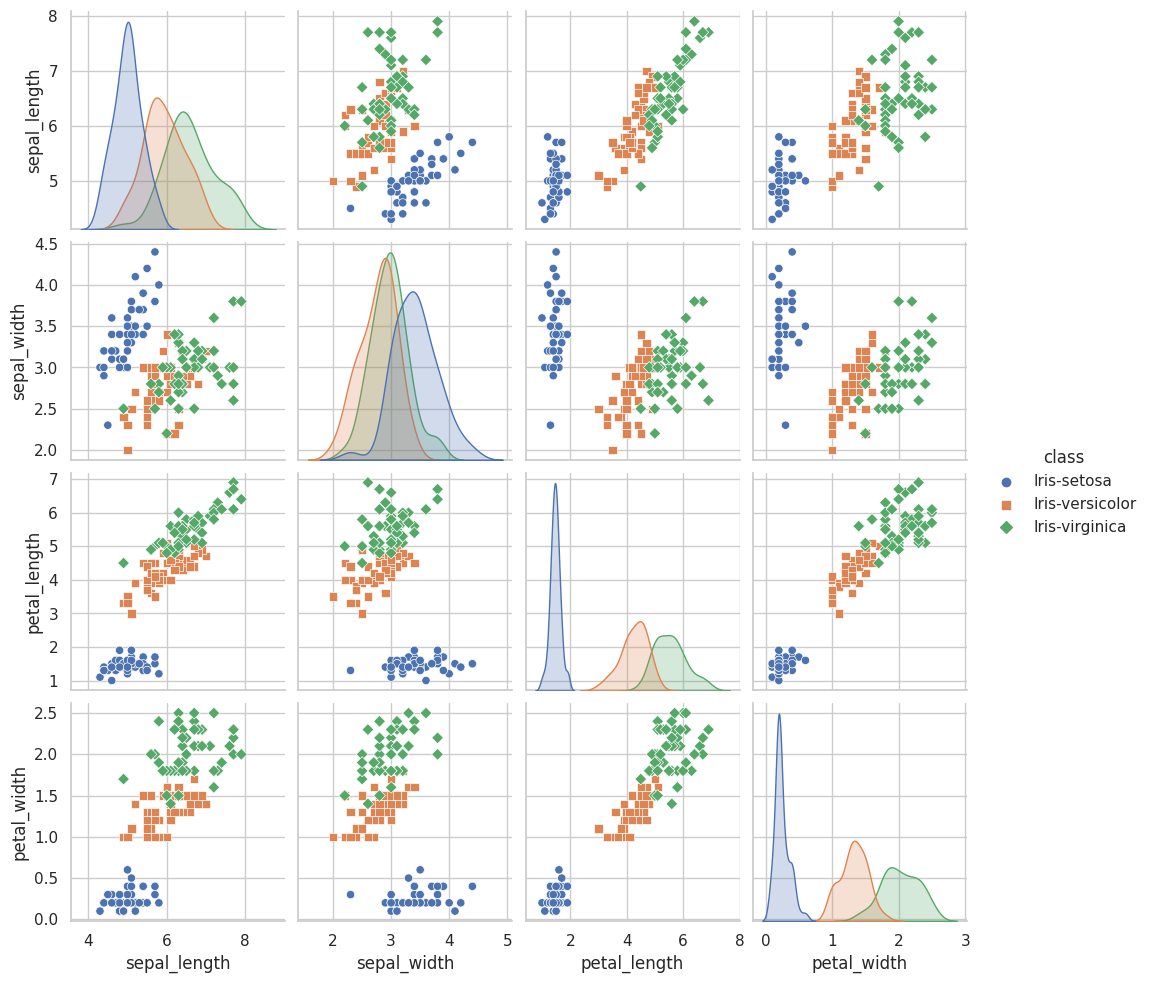

In [5]:
# Create a scatter plot matrix
sns.pairplot(data, hue="class", markers=["o", "s", "D"])
plt.show()

In [7]:
!pip install reportlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [8]:
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle

# Set up the document
doc = SimpleDocTemplate("report.pdf", pagesize=letter)

# Set up the content list
content = []

In [9]:
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle

# Set up the styles
styles = getSampleStyleSheet()
title_style = styles["Heading1"]
subtitle_style = styles["Heading2"]
text_style = styles["BodyText"]

# Add the title
title = Paragraph("Crafting an Elegant PDF Report for Your Python Data Analysis", title_style)
content.append(title)
# Add a spacer
content.append(Spacer(1, 12))

# Add the subtitle
subtitle = Paragraph("A Comprehensive Guide to Generating Insightful PDF Reports with Python", subtitle_style)
content.append(subtitle)

# Add some introductory text
intro = Paragraph("In this report, we present the results of our analysis on the Iris dataset. We have performed basic data analysis and created some visualizations to better understand the dataset.", text_style)
content.append(intro)

In [10]:
# Add a spacer
content.append(Spacer(1, 12))
# Save the scatter plot matrix as an image
scatter_plot_image = "scatter_plot_matrix.png"
sns.pairplot(data, hue="class", markers=["o", "s", "D"])
plt.savefig(scatter_plot_image)
plt.close()

# Add the scatter plot matrix image to the report
scatter_plot = Image(scatter_plot_image, width=500, height=400)
content.append(scatter_plot)

# Add a spacer
content.append(Spacer(1, 12))

# Create a table with summary statistics
summary_table = Table(grouped_data.mean().reset_index().values.tolist(), colWidths=[100, 100, 100, 100, 100])

# Style the table
summary_table_style = TableStyle([    ("BACKGROUND", (0, 0), (-1, 0), colors.grey),    ("TEXTCOLOR", (0, 0), (-1, 0), colors.whitesmoke),    ("ALIGN", (0, 0), (-1, -1), "CENTER"),    ("FONTNAME", (0, 0), (-1, 0), "Helvetica-Bold"),    ("FONTSIZE", (0, 0), (-1, 0), 14),    ("BOTTOMPADDING", (0, 0), (-1, 0), 12),    ("BACKGROUND", (0, 1), (-1, -1), colors.beige),    ("GRID", (0, 0), (-1, -1), 1, colors.black)])

summary_table.setStyle(summary_table_style)

# Add the summary statistics table to the report
content.append(summary_table)

# Add a spacer
content.append(Spacer(1, 24))

In [11]:
# Build the report
doc.build(content)